In [115]:
# %matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Understating the Data

In [116]:
#Read the data from "employee_performance.csv

data = pd.read_csv("NetflixOriginals.csv", encoding = "ISO-8859-1")

#Use the .head() function to check the start of the dataset
data.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [117]:
#Use the .tail() function to check the ending of the dataset
data.tail()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English


In [118]:
# Number of rows and columns.
print("Information about the data: \n")
data.info()

print(f"\nNumber of rows: {len(data)}")
print(f"Number of columns: {len(data.columns)}")

Information about the data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB

Number of rows: 584
Number of columns: 6


In [119]:
data.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [120]:
# We are converting data from string to a data object to modify it easier. 
type(data['Premiere'][2]) 
data['Date'] = pd.to_datetime(data.Premiere) 
data.drop(columns=['Premiere'],inplace=True)
data.head()

,Title,Genre,Runtime,IMDB Score,Language,Date
0,Enter the Anime,Documentary,58,2.5,English/Japanese,2019-08-05
1,Dark Forces,Thriller,81,2.6,Spanish,2020-08-21
2,The App,Science fiction/Drama,79,2.6,Italian,2019-12-26
3,The Open House,Horror thriller,94,3.2,English,2018-01-19
4,Kaali Khuhi,Mystery,90,3.4,Hindi,2020-10-30


In [121]:
# Check the repetitive data
print("Number of duplicated data in dataset:", data.duplicated().sum())

Number of duplicated data in dataset: 0


# Data Analysis

## What are the languages used in the full-feature films?

In [122]:
# To determine if a long-metric/full-feature is a full-feature film we can say that duration of the film
# should be longer than the 120 minutes. 

long_metric_threshold = 120
full_feature_films = data[data['Runtime']>=120].sort_values(by="Runtime", ascending=False) 

full_feature_films.head(10)

,Title,Genre,Runtime,IMDB Score,Language,Date
561,The Irishman,Crime drama,209,7.8,English,2019-11-27
328,Da 5 Bloods,War drama,155,6.5,English,2020-06-12
581,Springsteen on Broadway,One-man show,153,8.5,English,2018-12-16
284,The Forest of Love,Drama,151,6.3,Japanese,2019-10-11
247,Citation,Drama,151,6.2,English,2020-11-06
543,Ludo,Anthology/Dark comedy,149,7.6,Hindi,2020-11-12
509,Raat Akeli Hai,Thriller,149,7.3,Hindi,2020-07-31
7,The Last Days of American Crime,Heist film/Thriller,149,3.7,English,2020-06-05
194,Army of the Dead,Zombie/Heist,148,5.9,English,2021-05-21
5,Drive,Action,147,3.5,Hindi,2019-11-01


In [123]:
# Calculating how many movies are there for each langange in dataframe. 

data_languange_count = full_feature_films["Language"].value_counts()
data_languange_count

English                 48
Hindi                   11
Korean                   3
Japanese                 2
Spanish                  2
Marathi                  2
Khmer/English/French     1
English/Akan             1
English/Korean           1
Portuguese               1
Indonesian               1
English/Japanese         1
Name: Language, dtype: int64

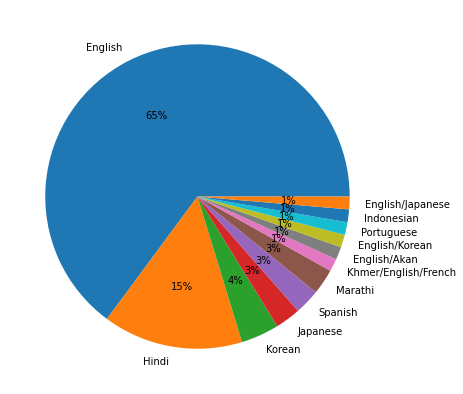

In [124]:
# Plotting the Pie figure. 

fig, ax = plt.subplots(figsize=(7,7))
fig = ax.pie(data_languange_count.values, labels = data_languange_count.index, autopct='%1.f%%')

### Result
- The longest film is the The Irishman with the 209 minutes run time. 
- Most of the films which are longer than the 120 minutes are in the English following Hindi with second. 

## Visualise the IMDB scores of movies that are premiered at the dates between "2019 January" and "2020 June" in the genre of "Documentary"